SVR (Raw Features Only):
  MSE = 41.9747
  R² = 0.9914

Updated 'test_eigen_data.csv' with predictions.


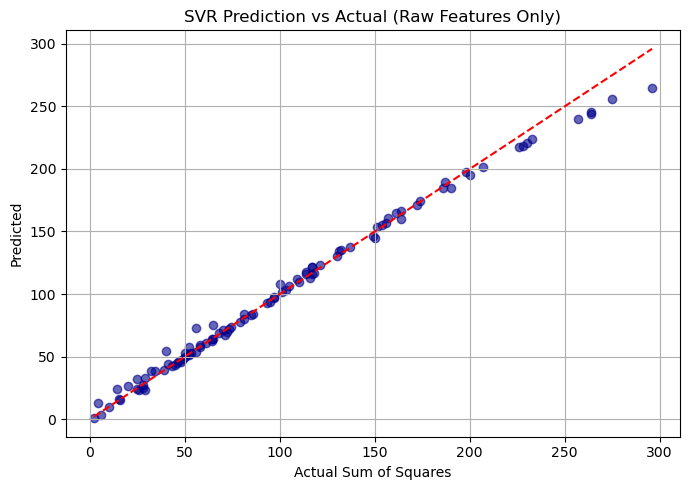

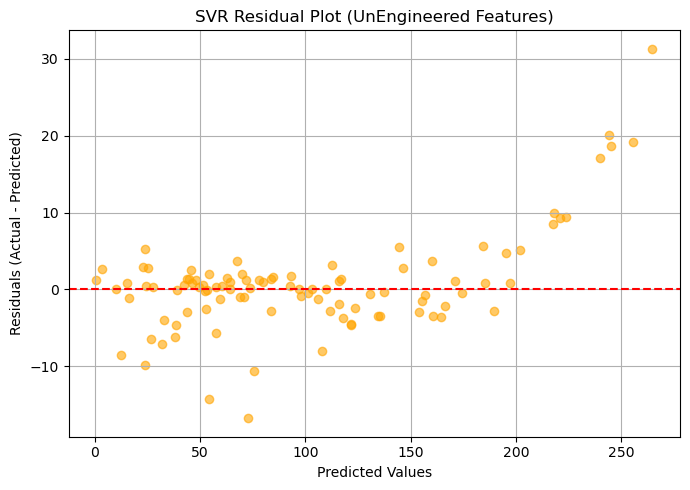

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train_eigen_data.csv")
test_df = pd.read_csv("test_eigen_data.csv")

features = ['a', 'b', 'c', 'd']
X_train = train_df[features]
y_train = train_df['sum_squared']
X_test = test_df[features]
y_test = test_df['sum_squared'] if 'sum_squared' in test_df.columns else None

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

if y_test is not None:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"SVR (Raw Features Only):\n  MSE = {mse:.4f}\n  R² = {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with predictions.")

if y_test is not None:
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='darkblue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual Sum of Squares")
    plt.ylabel("Predicted")
    plt.title("SVR Prediction vs Actual (Raw Features Only)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("SVR Residual Plot (UnEngineered Features)")
plt.grid(True)
plt.tight_layout()
plt.show()

SVR (Enhanced Features):
  MSE = 27.1299
  R² = 0.9944

Updated 'test_eigen_data.csv' with predictions.


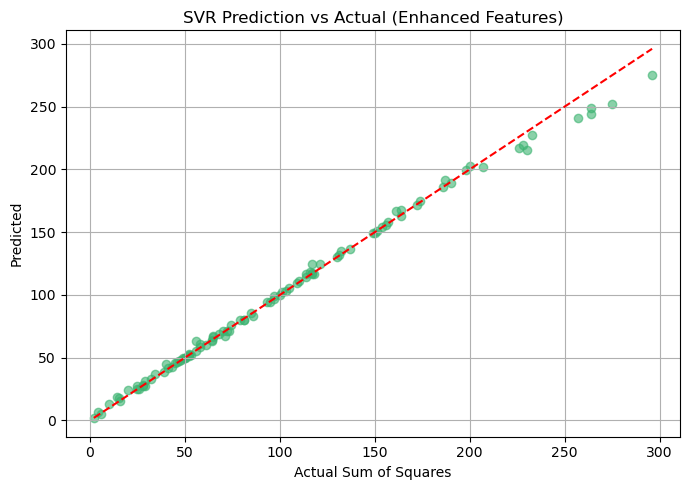

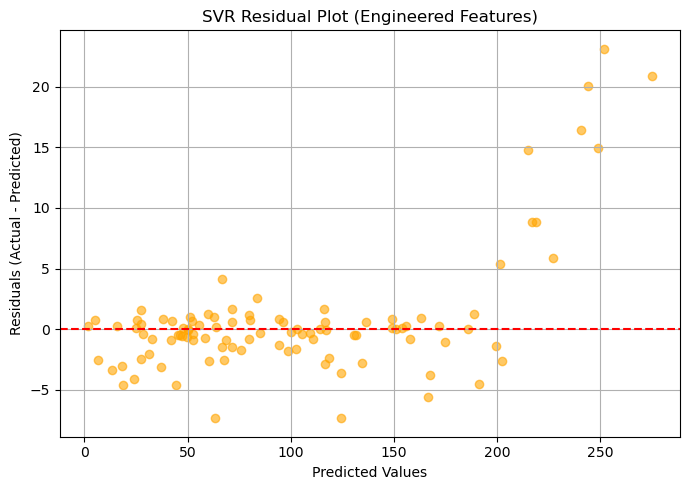

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

train_df = pd.read_csv("train_eigen_data.csv")
test_df = pd.read_csv("test_eigen_data.csv")

for df in [train_df, test_df]:
    df['trace'] = df['a'] + df['d']
    df['det'] = df['a'] * df['d'] - df['b'] * df['c']
    df['symmetry'] = np.abs(df['b'] - df['c'])

features = ['a', 'b', 'c', 'd', 'trace', 'det', 'symmetry']
X_train = train_df[features]
y_train = train_df['sum_squared']
X_test = test_df[features]
y_test = test_df['sum_squared'] if 'sum_squared' in test_df.columns else None

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

if y_test is not None:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"SVR (Enhanced Features):\n  MSE = {mse:.4f}\n  R² = {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with predictions.")

if y_test is not None:
    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='mediumseagreen')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual Sum of Squares")
    plt.ylabel("Predicted")
    plt.title("SVR Prediction vs Actual (Enhanced Features)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("SVR Residual Plot (Engineered Features)")
plt.grid(True)
plt.tight_layout()
plt.show()
